# Load and Glance Data

In [1]:
%config Completer.use_jedi = False

In [2]:
#required packages
import numpy as np
import pandas as pd
import operator
from matplotlib import pyplot as plt

In [3]:
#read the data
origin = pd.read_csv("../MasterKickstarter.csv")
#glance the data
origin.head()

,Unnamed: 0,X1,X1_1,Country,City,id,name,blurb,goal,pledged,...,Backers_as_Prct_of_Pop_YM,Backers_as_Prct_of_Pop_Y,Days_spent_making_campign,Days_inception_to_Deadline,Backers_in_city_Y,Backers_in_city_YM,All_Time_Backers_city,Mean_Pledge_City,Mean_pledge_city_Y,Mean_pledge_city_YM
0,1,1,1,AUS,Adelaide,1337161279,"Worlds & Creatures, the Art of Anthony Christou",A 100 page Artbook featuring the work of Antho...,5000.0,16081.00,...,0.020015,0.044034,21,59,473,215,1672,3124.0,2975.532222,215.0
1,2,2,2,AUS,Adelaide,1533913565,Pheonician Entertainment Productions,"Wordsmith! The story of good vs Evil, Hero vs ...",5500.0,257.00,...,0.000465,0.044034,22,62,473,5,1672,3124.0,2975.532222,2.5
2,3,3,3,AUS,Adelaide,1666009607,The Postnatalist - Second issue comic book,The Postnatalist explores feminist issues invo...,300.0,353.12,...,0.000838,0.000931,3,48,10,9,1672,3124.0,94.440000,4.5
3,4,4,4,AUS,Adelaide,1759296231,Alkandros: Futurewear 3000 Square Sunglasses; ...,Alkandros Designs is interested in being diffe...,5000.0,90.00,...,0.000279,0.044034,84,144,473,3,1672,3124.0,2975.532222,3.0
4,5,5,5,AUS,Adelaide,458085213,School of the Road: Autism and Adventure Docum...,A feature length documentary and educational s...,100000.0,16272.56,...,0.009310,0.044034,68,103,473,100,1672,3124.0,2975.532222,100.0


## We can see that the "Unamed 0, X1, X1_1, id" columns are useless, so we drop them

In [4]:
#drop columns with id
data = origin.iloc[:,3:].drop(columns=['id'])
data.head()

,Country,City,name,blurb,goal,pledged,status,slug,disable_communication,currency,...,Backers_as_Prct_of_Pop_YM,Backers_as_Prct_of_Pop_Y,Days_spent_making_campign,Days_inception_to_Deadline,Backers_in_city_Y,Backers_in_city_YM,All_Time_Backers_city,Mean_Pledge_City,Mean_pledge_city_Y,Mean_pledge_city_YM
0,AUS,Adelaide,"Worlds & Creatures, the Art of Anthony Christou",A 100 page Artbook featuring the work of Antho...,5000.0,16081.00,successful,worlds-and-creatures-the-art-of-anthony-christou,False,AUD,...,0.020015,0.044034,21,59,473,215,1672,3124.0,2975.532222,215.0
1,AUS,Adelaide,Pheonician Entertainment Productions,"Wordsmith! The story of good vs Evil, Hero vs ...",5500.0,257.00,failed,pheonician-entertainment-productions,False,AUD,...,0.000465,0.044034,22,62,473,5,1672,3124.0,2975.532222,2.5
2,AUS,Adelaide,The Postnatalist - Second issue comic book,The Postnatalist explores feminist issues invo...,300.0,353.12,successful,the-postnatalist-second-issue-comic-book,False,AUD,...,0.000838,0.000931,3,48,10,9,1672,3124.0,94.440000,4.5
3,AUS,Adelaide,Alkandros: Futurewear 3000 Square Sunglasses; ...,Alkandros Designs is interested in being diffe...,5000.0,90.00,failed,alkandros-futurewear-3000-square-sunglasses-be...,False,AUD,...,0.000279,0.044034,84,144,473,3,1672,3124.0,2975.532222,3.0
4,AUS,Adelaide,School of the Road: Autism and Adventure Docum...,A feature length documentary and educational s...,100000.0,16272.56,live,school-of-the-road-autism-and-adventure-docume...,False,AUD,...,0.009310,0.044034,68,103,473,100,1672,3124.0,2975.532222,100.0


## Check the Status Distribution

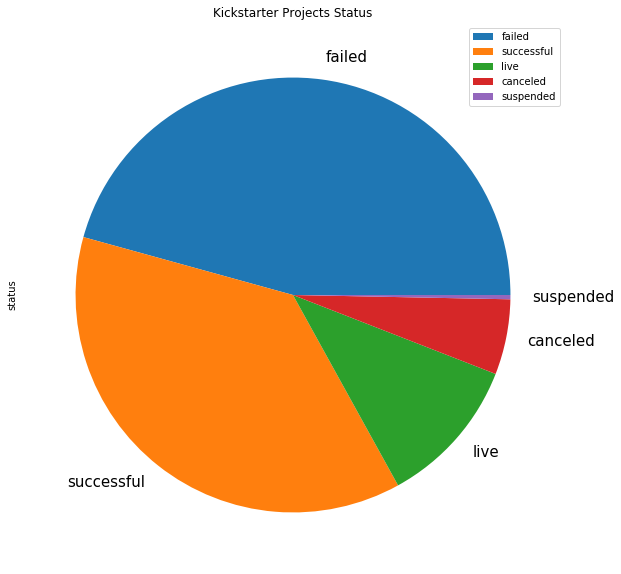

In [5]:
data.status.value_counts().plot(figsize = (10,10),kind='pie',legend= True,title='Kickstarter Projects Status',fontsize=15)

# Categories Analysis

## Besides the geography features, the categories of project is another important feature, lets analyze the category with  the project status

In [6]:
#list all categories
data.Categories.unique()

array(['publishing', 'art', 'fashion', 'film%20&%20video', 'comics',
       'technology', 'games', 'design', 'crafts', 'journalism', 'food',
       'music', 'photography', 'theater', 'dance'], dtype=object)

In [7]:
#iterate the data by categories and store the number of different status in that categories into a dictionary
ct_dic = {}
ct_ind = {'successful':0, 'failed':1, 'live':2, 'canceled':3, 'suspended':4}
for index,row in data.iterrows():
    key = row['Categories']
    i = ct_ind[row['status']]
    tmp = [0]*5
    if key in ct_dic:
        tmp = ct_dic[key]
    tmp[i] += 1
    ct_dic[key] = tmp

In [8]:
#convert the dictionary into dataframe for easy processing
ct_df = pd.DataFrame.from_dict(ct_dic)
ct_df = ct_df.append(dict(ct_df.sum()),ignore_index=True).T
#sort the dataframe by the total amount of project
ct_df = ct_df.sort_values(by=[5], ascending=True)

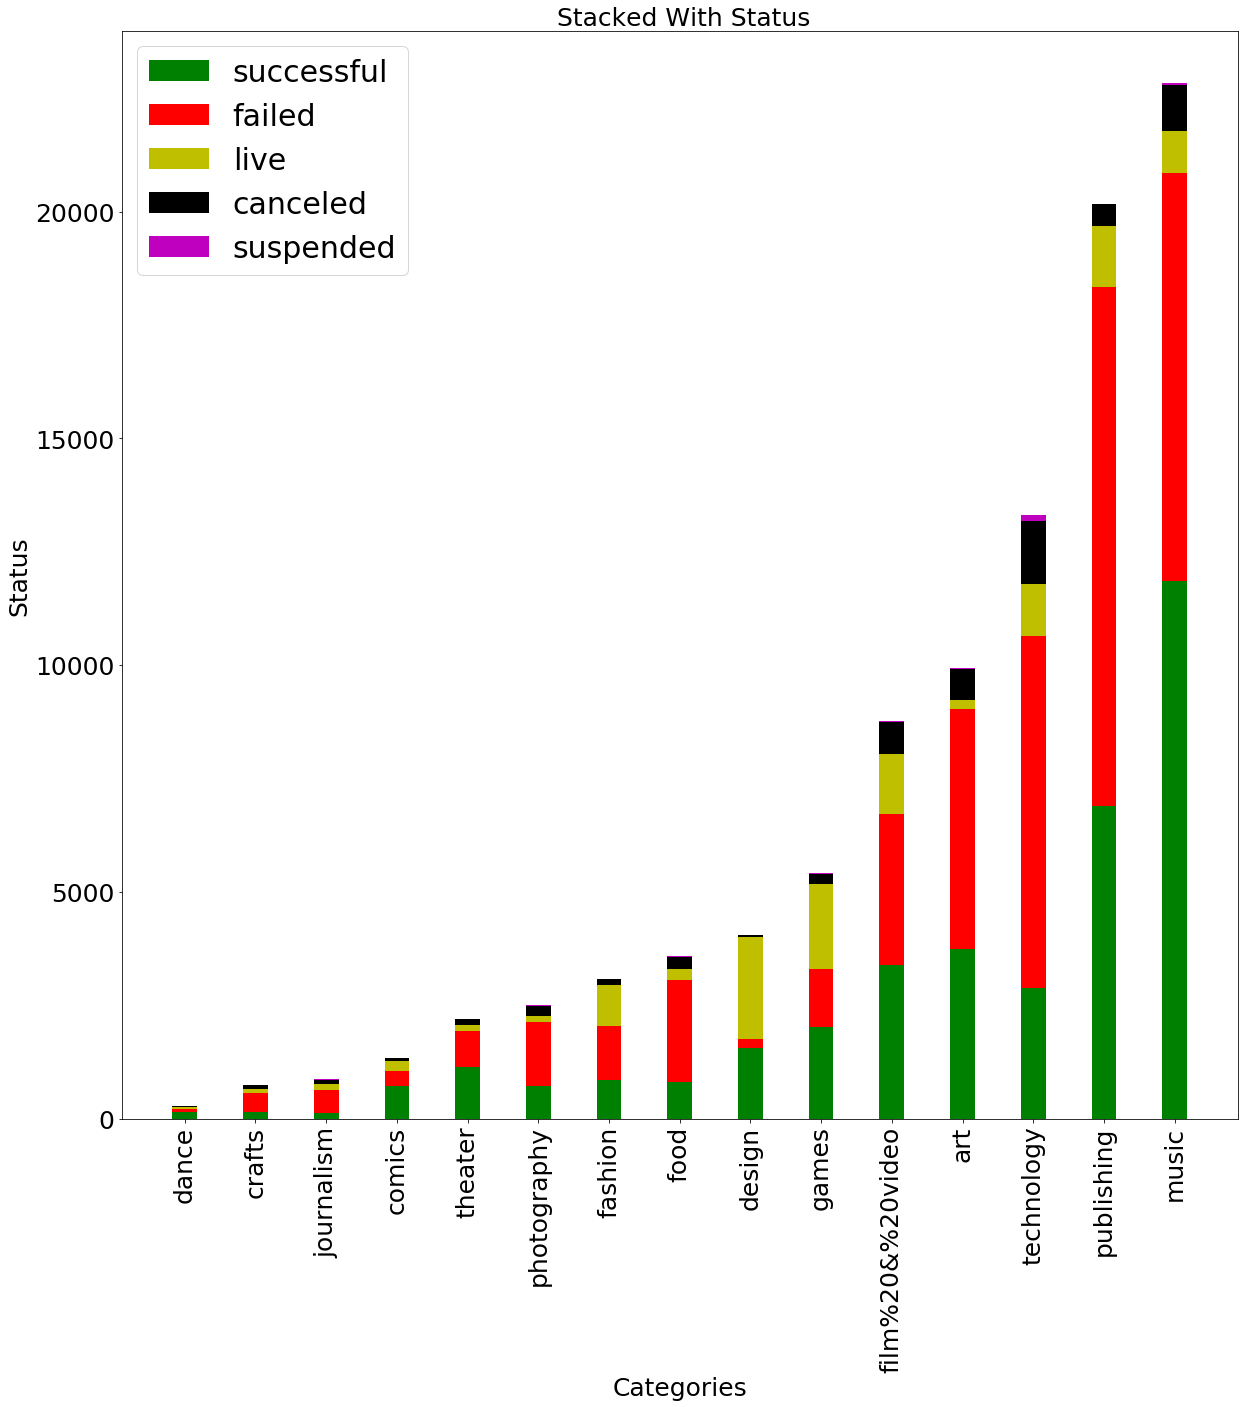

In [9]:
#plot the stacked bar
N = len(ct_df)
suc = ct_df.iloc[:,0]
fai = ct_df.iloc[:,1]
liv = ct_df.iloc[:,2]
can = ct_df.iloc[:,3]
sus = ct_df.iloc[:,4]

#separate the project of different status in differnet categories
ind = np.arange(N)
width = 0.35

plt.figure(figsize=(20,20))

#setup the vertical bar
p1 = plt.bar(ind, suc, width, color = 'g')
p2 = plt.bar(ind, fai, width, bottom=np.array(suc), color = 'r')
p3 = plt.bar(ind, liv, width, bottom=np.array(suc)+np.array(fai),color = 'y')
p4 = plt.bar(ind, can, width, bottom=np.array(suc)+np.array(fai)+np.array(liv),color = 'k')
p5 = plt.bar(ind, sus, width, bottom=np.array(suc)+np.array(fai)+np.array(liv)+np.array(can),color = 'm')

plt.xlabel('Categories',fontsize = 25)
plt.ylabel('Status',fontsize = 25)
plt.title(' Stacked With Status',fontsize = 25)
plt.xticks(ind, ct_df.index,fontsize = 25,rotation=90)
plt.yticks(fontsize = 25)
plt.legend((p1[0], p2[0],p3[0],p4[0],p5[0]), ('successful', 'failed', 'live', 'canceled', 'suspended'),loc='upper left',fontsize = 30)
plt.savefig('cat_status.png')
plt.show()

# Time Analysis

## Before building model to fit the data, we should notice that the time-related features seem not quiet meaningful to the model, let's do a quick analysis

In [10]:
#list all possible time
data.launched_atYM.unique()

array(['17-05', '17-06', '14-12', '17-02', '17-08', '14-06', '17-09',
       '15-09', '17-07', '16-11', '16-09', '16-12', '14-05', '17-04',
       '14-02', '15-03', '17-03', '13-11', '16-08', '16-01', '16-10',
       '16-07', '15-05', '17-01', '15-07', '14-04', '16-03', '14-07',
       '15-02', '15-10', '16-02', '14-10', '14-08', '15-01', '14-01',
       '16-05', '14-11', '14-09', '15-11', '15-12', '16-04', '15-08',
       '16-06', '13-09', '13-10', '15-04', '13-12', '14-03', '15-06',
       '13-02', '13-06', '13-05', '13-03', '13-08', '13-07', '13-04',
       '12-12', '12-11', '13-01', '12-02', '12-07', '09-09', '12-06',
       '12-09', '11-12', '11-07', '10-09', '11-02', '12-10', '12-08',
       '10-08', '10-12', '12-05', '10-01', '12-01', '12-04', '10-02',
       '11-09', '10-11', '12-03', '11-06', '11-05', '10-06', '11-03',
       '11-11', '11-01', '11-10', '11-08', '11-04', '10-10', '10-04',
       '09-10', '10-07', '10-03', '09-11', '10-05', '09-05', '09-07',
       '09-08', '09-

In [11]:
#store the count of each timestamp
time_d = dict(data.groupby('launched_atYM').count().iloc[:,1])
#sort the data
time_s = sorted(time_d.items(),key=operator.itemgetter(0))

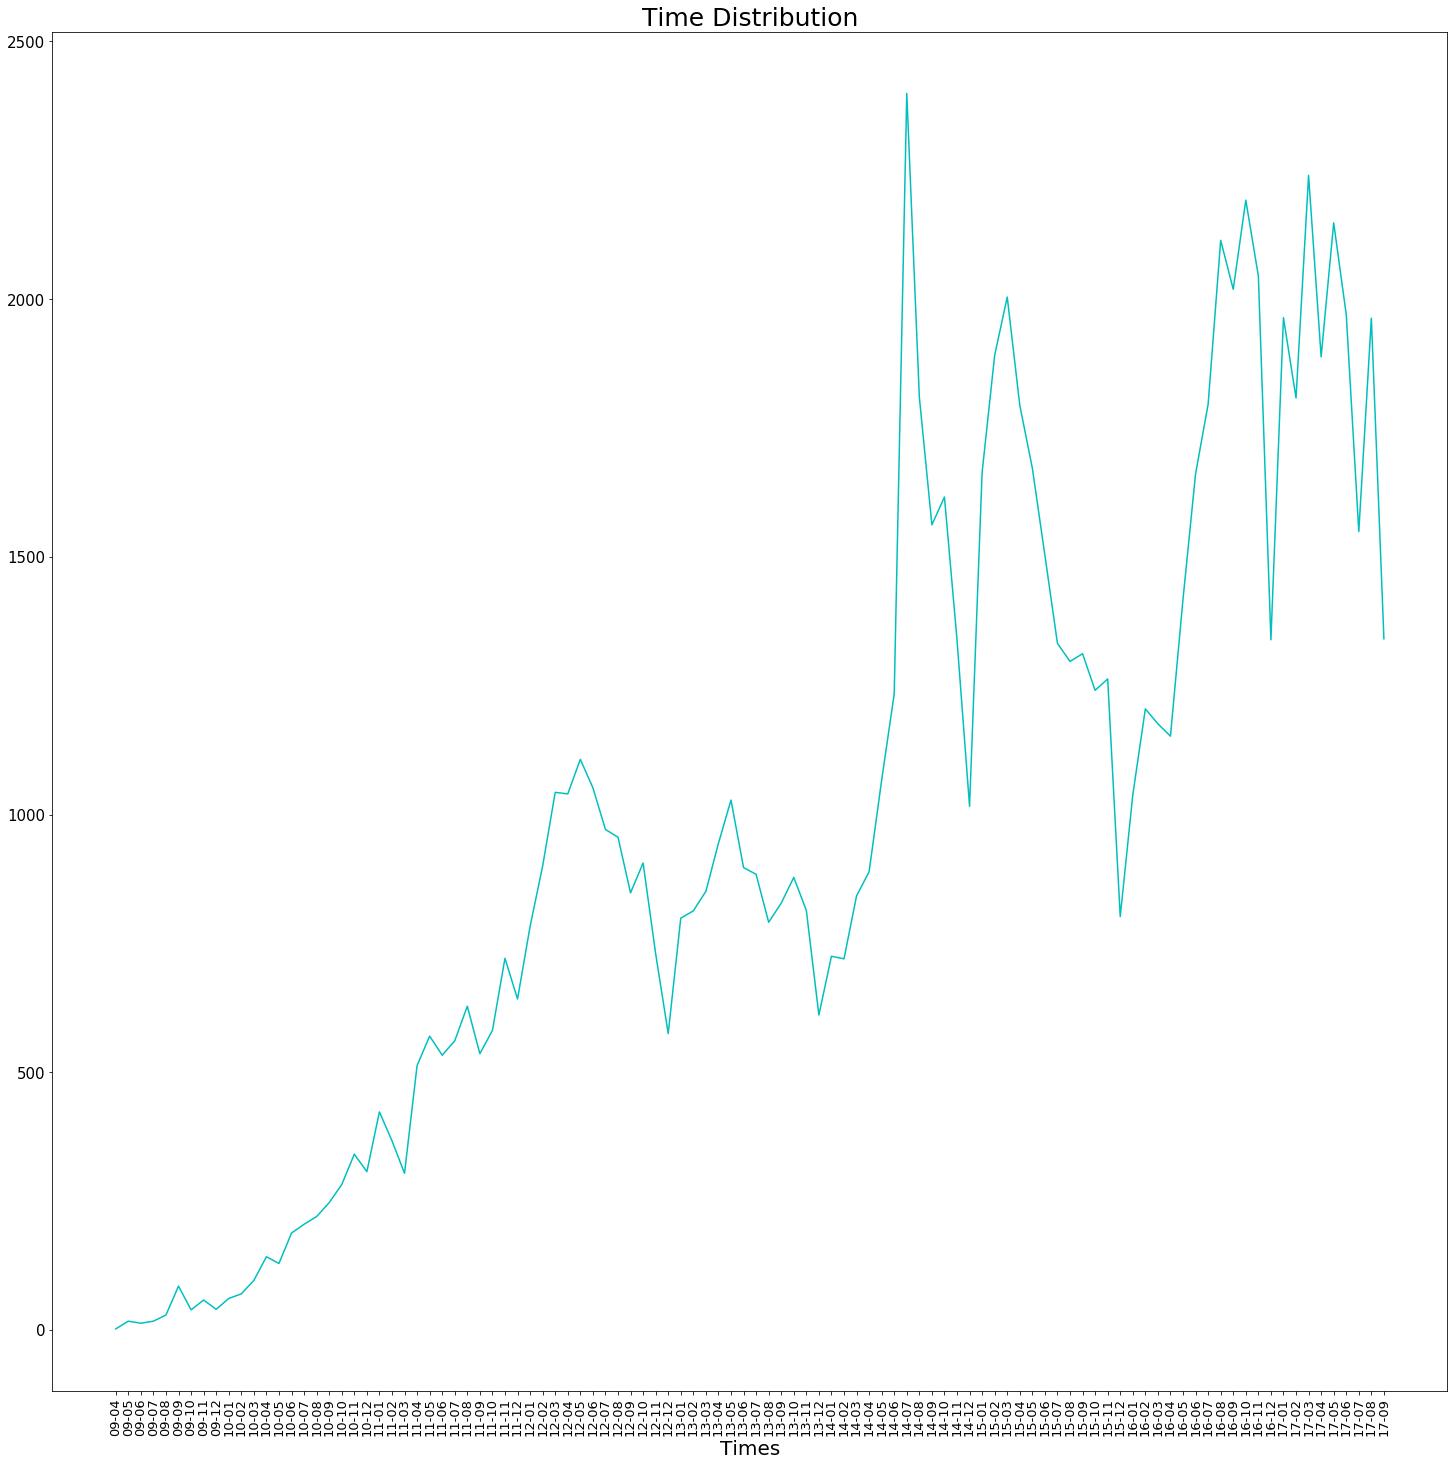

In [12]:
#plot the time line
plt.figure(figsize=(25,25))
objects = [k[0] for k in list(time_s)]
val = [v[1] for v in time_s]
plt.plot(objects, val, color='c')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 13,rotation=90)
plt.xlabel('Times',fontsize = 20)
plt.title('Time Distribution',fontsize = 25)
plt.savefig('Times_Distribution.png')
plt.show()

## Now let's plot the project launch time with the status

In [13]:
#iterate the data by lauch time and store the number of different status in that timestamp into a dictionary
t_dic = {}
t_ind = {'successful':0, 'failed':1, 'live':2, 'canceled':3, 'suspended':4}
for index,row in data.iterrows():
    key = row['launched_atYM']
    i = t_ind[row['status']]
    tmp = [0]*5
    if key in t_dic:
        tmp = t_dic[key]
    tmp[i] += 1
    t_dic[key] = tmp

In [14]:
#convert the dictionary into dataframe for easy processing
t_df = pd.DataFrame.from_dict(t_dic).T
#sort the dataframe by the time stamp
t_df = t_df.sort_index()

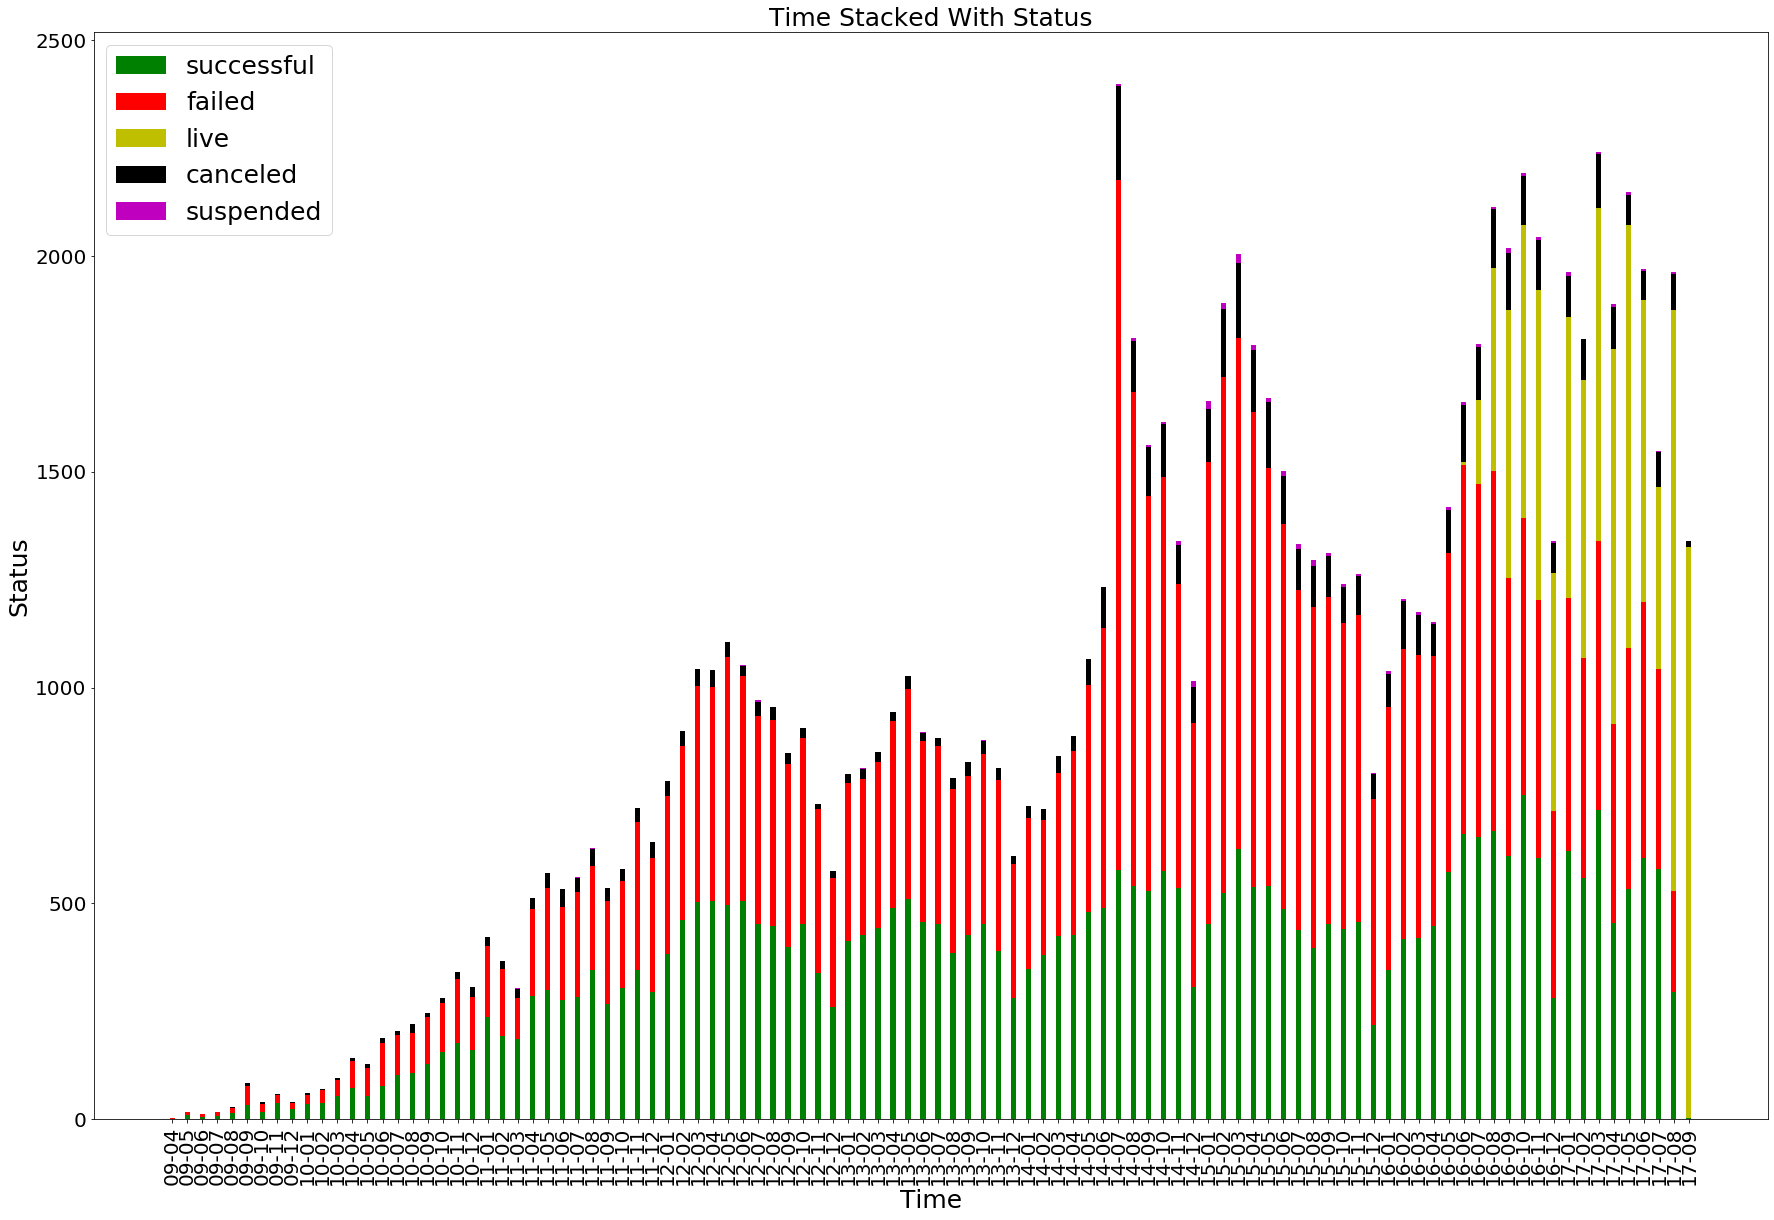

In [15]:
#plot the stacked bar
N = len(t_df)
suc = t_df.iloc[:,0]
fai = t_df.iloc[:,1]
liv = t_df.iloc[:,2]
can = t_df.iloc[:,3]
sus = t_df.iloc[:,4]

#separate the project of different status in differnet categories
ind = np.arange(N)
width = 0.35

plt.figure(figsize=(30,20))

#setup the vertical bar
p1 = plt.bar(ind, suc, width, color = 'g')
p2 = plt.bar(ind, fai, width, bottom=np.array(suc), color = 'r')
p3 = plt.bar(ind, liv, width, bottom=np.array(suc)+np.array(fai),color = 'y')
p4 = plt.bar(ind, can, width, bottom=np.array(suc)+np.array(fai)+np.array(liv),color = 'k')
p5 = plt.bar(ind, sus, width, bottom=np.array(suc)+np.array(fai)+np.array(liv)+np.array(can),color = 'm')

plt.xlabel('Time',fontsize = 25)
plt.ylabel('Status',fontsize = 25)
plt.title('Time Stacked With Status',fontsize = 25)
plt.xticks(ind, t_df.index,rotation = 90,fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend((p1[0], p2[0],p3[0],p4[0],p5[0]), ('successful', 'failed', 'live', 'canceled', 'suspended'),\
           loc='upper left',fontsize = 25)
plt.savefig('time_status.png')
plt.show()

## We can also check the Pledged USD and Pledge per person attributes with the categories

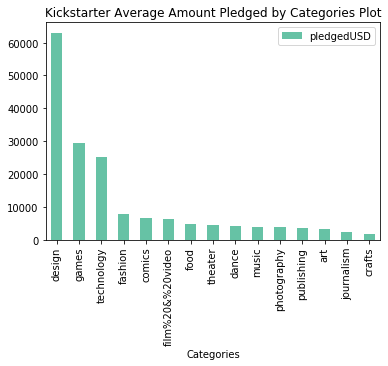

In [16]:
data.groupby('Categories').pledgedUSD.mean().sort_values(ascending=False).plot(kind='bar',legend= True,colormap='Set2',title='Kickstarter Average Amount Pledged by Categories Plot',fontsize=10)

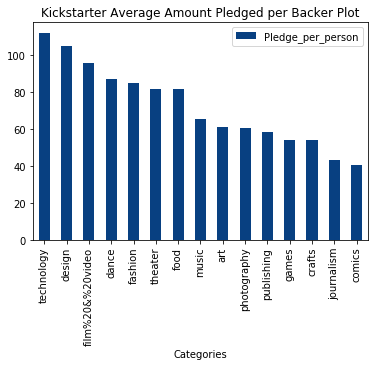

In [17]:
data.groupby('Categories').Pledge_per_person.mean().sort_values(ascending=False).plot(kind='bar',legend= True,colormap='GnBu_r',title='Kickstarter Average Amount Pledged per Backer Plot',fontsize=10)

# Geography Analysis

## There many geography-related features in the data, let's select them and analyse

In [18]:
#all unique values from country
data.Country.unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CHE', 'DEU', 'DNK', 'ESP', 'FRA',
       'GBR', 'IRL', 'ITA', 'JPN', 'LUX', 'MEX', 'NLD', 'NOR', 'NZL',
       'SGP', 'SWE', 'USA'], dtype=object)

In [19]:
#count the number of different countries
country_count = dict(data.groupby('Country').count().iloc[:,1])

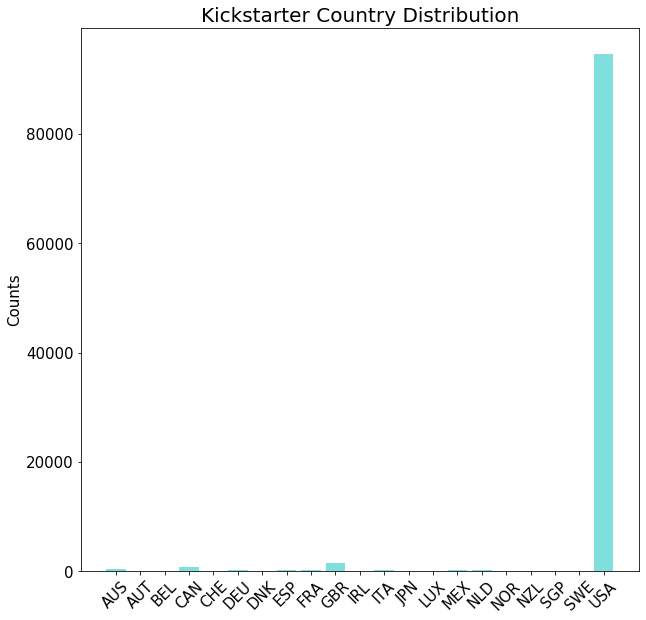

In [20]:
#plot the number of projects in different contries
plt.figure(figsize=(10,10))
objects = [k for k in country_count]
y_pos = np.arange(len(objects))
val = [v for v in country_count.values()]
plt.bar(y_pos, val, align='center', alpha=0.5,color='c')
plt.xticks(y_pos, objects,fontsize = 15,rotation = 45)
plt.yticks(fontsize = 15)
plt.ylabel('Counts',fontsize = 15)
plt.title('Kickstarter Country Distribution',fontsize=20)
plt.savefig('Country_Distribution.png')
plt.show()

## Since most of the projects are in USA, Combine the project outside USA and compare with State in USA

In [21]:
#store the count of each states, including the non-USA
states_o = dict(data.groupby('State').count().iloc[:,1])
#sort the data by total amount
states = sorted(states_o.items(),key=operator.itemgetter(1))
#change the order of non-usa to get a better comparison
tmp = states.pop(-2)
states.append(tmp)

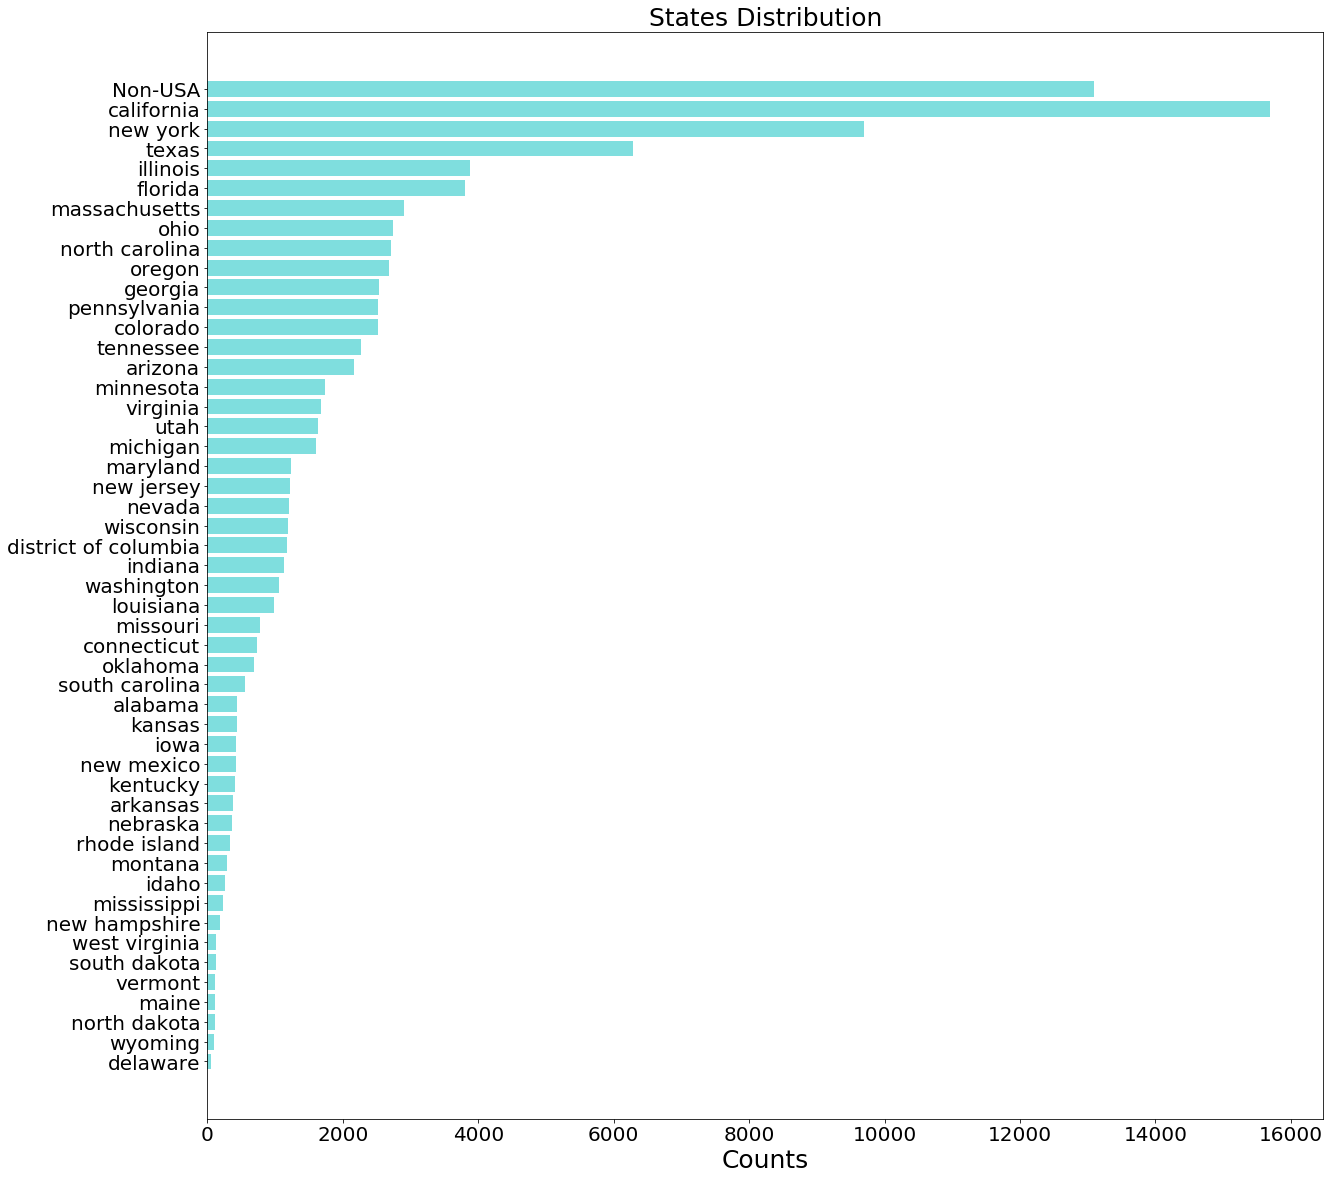

In [22]:
#plot the amount of projects in each state inside USA, as well as non-USA
plt.figure(figsize=(20,20))
objects = [k[0] for k in states]
y_pos = np.arange(len(objects))
val = [v[1] for v in states]
plt.barh(y_pos, val, align='center', alpha=0.5,color='c')
plt.yticks(y_pos, objects,fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlabel('Counts',fontsize = 25)
plt.title('States Distribution',fontsize = 25)
plt.savefig('States_Distribution.png')
plt.show()

## There's no too much meaning just comparing the total amount of projects instead of comparing the project status, now let's combine the plot with project status

In [23]:
#list all status
data.status.unique()

array(['successful', 'failed', 'live', 'canceled', 'suspended'],
      dtype=object)

In [24]:
#iterate the data by state and store the number of different status in that state into a dictionary
st_dic = {}
st_ind = {'successful':0, 'failed':1, 'live':2, 'canceled':3, 'suspended':4}
for index,row in data.iterrows():
    key = row['State']
    i = st_ind[row['status']]
    tmp = [0]*5
    if key in st_dic:
        tmp = st_dic[key]
    tmp[i] += 1
    st_dic[key] = tmp

In [25]:
#convert the dictionary into dataframe for easy processing
st_df = pd.DataFrame.from_dict(st_dic)
st_df = st_df.append(dict(st_df.sum()),ignore_index=True).T
#sort the dataframe by the total amount of project
st_df = st_df.sort_values(by=[5], ascending=True)
#reorder the locaiton of non-usa for better comparison
tmp = st_df.iloc[-2,:]
st_df = st_df.drop(st_df.index[-2]).append(tmp)

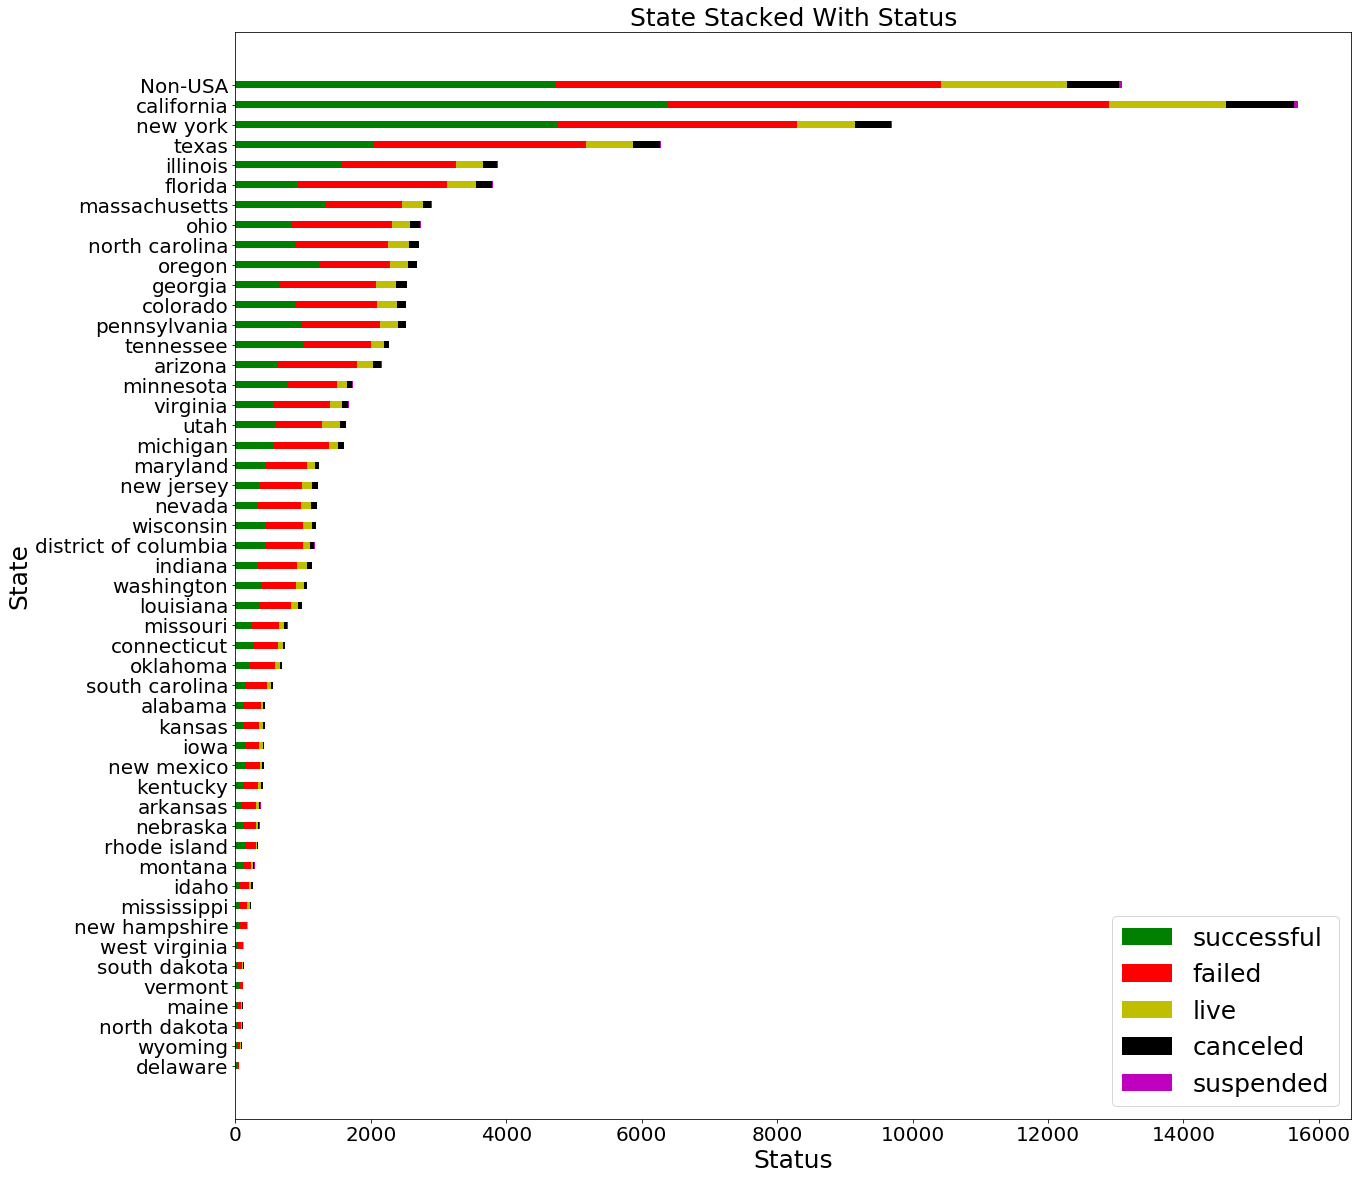

In [26]:
#plot the stacked bar
N = len(st_df)

#separate the project of different status in differnet states
suc = st_df.iloc[:,0]
fai = st_df.iloc[:,1]
liv = st_df.iloc[:,2]
can = st_df.iloc[:,3]
sus = st_df.iloc[:,4]
ind = np.arange(N)
width = 0.35

plt.figure(figsize=(20,20))

#setup the horizontal bar, since there're so many states variables
p1 = plt.barh(ind, suc, width, color = 'g')
p2 = plt.barh(ind, fai, width, left=np.array(suc), color = 'r')
p3 = plt.barh(ind, liv, width, left=np.array(suc)+np.array(fai),color = 'y')
p4 = plt.barh(ind, can, width, left=np.array(suc)+np.array(fai)+np.array(liv),color = 'k')
p5 = plt.barh(ind, sus, width, left=np.array(suc)+np.array(fai)+np.array(liv)+np.array(can),color = 'm')

plt.ylabel('State',fontsize = 25)
plt.xlabel('Status',fontsize = 25)
plt.title('State Stacked With Status',fontsize = 25)
plt.yticks(ind, st_df.index,fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend((p1[0], p2[0],p3[0],p4[0],p5[0]), ('successful', 'failed', 'live', 'canceled', 'suspended'),\
           loc='lower right',fontsize = 25)
plt.savefig('state_status.png')
plt.show()

# Use wordcloud to see the word feature of success and failed project

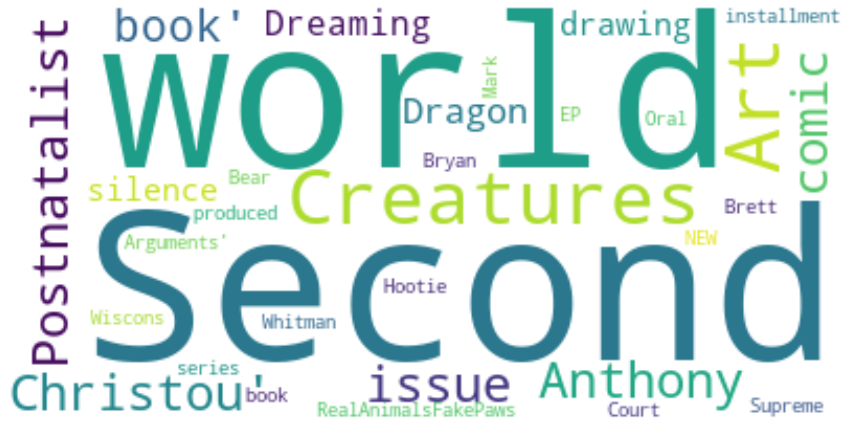

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

successful_name = data[data.status == 'successful']['name'].values
wordcloud = WordCloud(background_color='white').generate(str(successful_name))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

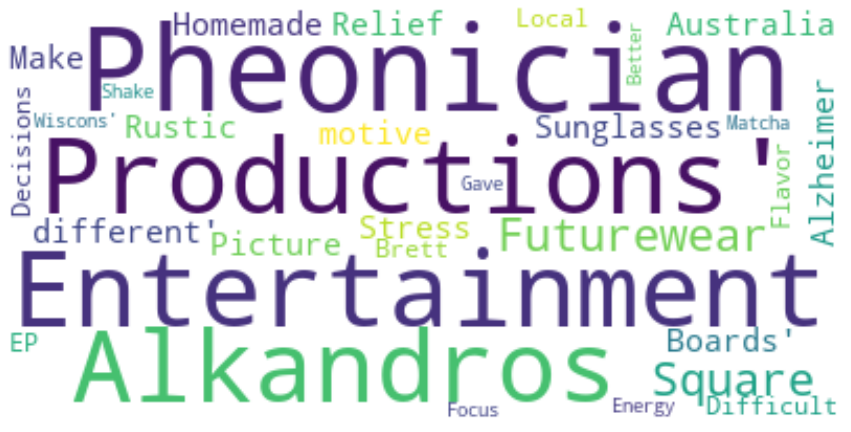

In [28]:
failure_name = data[data.status == 'failed']['name'].values
wordcloud1 = WordCloud(background_color='white').generate(str(failure_name))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()